In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sea
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# load the data set and preview
df = pd.read_csv('price_Optimization.csv')
df.info(), df, df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Competitors_Price  100 non-null    float64
 1   Demand             100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


(None,
     Competitors_Price      Demand
 0            5.939322  993.716473
 1            7.436704  993.329599
 2            6.424870  993.499055
 3            5.903949  993.758589
 4            4.812893  993.679768
 ..                ...         ...
 95           2.648722  994.299717
 96           6.278616  993.623798
 97           1.180968  995.573726
 98           8.460460  993.286717
 99           1.042259  995.345089
 
 [100 rows x 2 columns],
        Competitors_Price      Demand
 count         100.000000  100.000000
 mean            5.255145  993.883179
 std             2.607786    0.637178
 min             1.042259  993.020004
 25%             2.852228  993.386564
 50%             5.207329  993.693825
 75%             7.160349  994.316985
 max             9.895365  995.573726)

/Users/JonathanCrowell/opt/anaconda3/envs/info4k/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1258: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Demand', ylabel='Competitors_Price'>

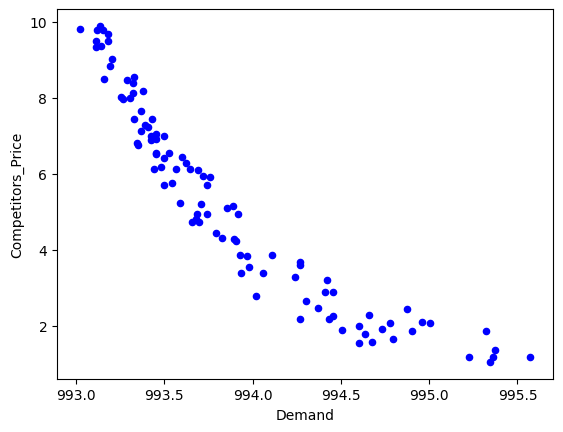

In [3]:
# scatterplot of historical data
df.plot.scatter(x='Demand',y='Competitors_Price',c='b')

In [4]:
# save data to variables and preview
X = df['Demand'].to_numpy().reshape(-1,1)
y = df['Competitors_Price'].to_numpy().reshape(-1,1)
X.shape, X[:4], y.shape, y[:4]

((100, 1),
 array([[993.716473  ],
        [993.32959908],
        [993.49905549],
        [993.75858897]]),
 (100, 1),
 array([[5.93932154],
        [7.4367043 ],
        [6.42487038],
        [5.90394865]]))

In [5]:
# split dataset and check shapes
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.1,random_state=33)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((90, 1), (10, 1), (90, 1), (10, 1))

In [6]:
# create the models and fit with train data
regtree = DecisionTreeRegressor(random_state=33,max_depth=3)
regtree = regtree.fit(X_train,y_train)
# make predictions based on train and test
train_pred = regtree.predict(X_train)
test_pred = regtree.predict(X_test)
train_pred[:4], test_pred[:4]

(array([5.85299348, 7.04609142, 2.57358769, 5.85299348]),
 array([7.04609142, 3.48158385, 2.57358769, 1.6996187 ]))

In [7]:
# evaluate model on train data
MSE_train = mean_squared_error(train_pred,y_train)
RMSE_train = np.sqrt(mean_squared_error(train_pred,y_train))
MSE_train, RMSE_train

(0.19924008946044222, 0.4463631811209816)

In [8]:
# evaluate model on test data
MSE_test = mean_squared_error(test_pred,y_test)
RMSE_test = np.sqrt(mean_squared_error(test_pred,y_test))
MAE_test = mean_absolute_error(test_pred,y_test)
R2_test = r2_score(test_pred,y_test)

MSE_test, RMSE_test, MAE_test, R2_test

(0.37285710629655683,
 0.6106202635816771,
 0.5134286633402845,
 0.9336913157388202)

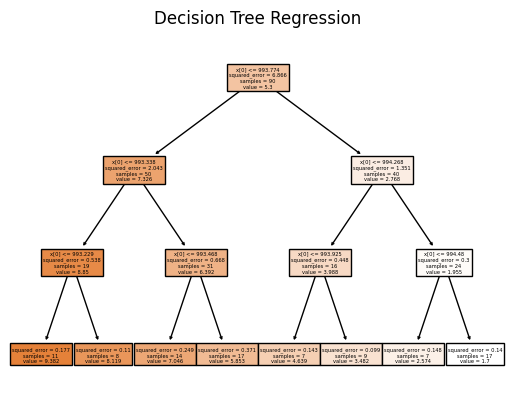

In [9]:
plt.figure()
sk.tree.plot_tree(regtree, filled=True)
plt.title("Decision Tree Regression")
plt.show()

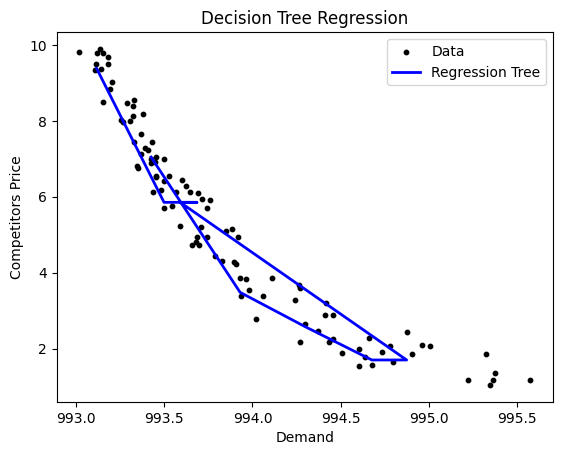

In [10]:
# Plot the results
plt.figure()
plt.scatter(X, y, s=10, c="k", label="Data")
plt.plot(X_test, test_pred, color="b", label="Regression Tree", linewidth=2)
plt.xlabel("Demand")
plt.ylabel("Competitors Price")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()